In [31]:
import numpy as np
import scipy.spatial as sp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

mysigma=3

def sq_exp(X, X_star, length_scale):
    """
    Args:
        X (nparray): (n, d)
        X_star (nparray): (m, d)
        length_scale (float): 
    """
    dist = sp.distance.cdist(X, X_star)
    k1 = np.exp(-dist**2/(2*length_scale**2))
    
    return k1 * mysigma*mysigma

def brownian(X, X_star, _):
    """
    Args:
        X (nparray): (n, d)
        X_star (nparray): (m, d)
        length_scale (float): 
    """
    arr = np.empty((X.shape[0], X_star.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X_star.shape[0]):
            arr[i,j] = min(i+1,j+1)

    return arr * mysigma*mysigma

def sample_prior(X, length_scale, N, kernel=sq_exp):
    """
    Args:
        X (nparray): (n, d)
        length_scale (float): 
        N (int): 
    """
    n = X.shape[0]
    k = kernel(X, X, length_scale)
    samples = np.random.multivariate_normal([0]*n, k, N)
    return samples

def predictive_mean(X, y, X_star, length_scale, sigma, kernel=sq_exp):
    """
    Args:
        X (nparray): (n, d)
        y (nparray): (n, 1)
        X_star (nparray): (m, d)
        length_scale (float): 
        sigma (float)
    """
    n = X.shape[0]
    K_xstar_x = kernel(X_star, X, length_scale)
    K_x_x = kernel(X, X, length_scale)

    return \
    np.matmul(K_xstar_x, np.matmul(np.linalg.inv(K_x_x+sigma**2*np.eye(n)), y))

def predictive_cov(X, y, X_star, length_scale, sigma,kernel=sq_exp):
    """
    Args:
        X (nparray): (n, d)
        y (nparray): (n, 1)
        X_star (nparray): (m, d)
        length_scale (float): 
        sigma (float):
    """

    n = X.shape[0]
    K_xstar_xstar = kernel(X_star, X_star, length_scale)
    K_xstar_x = kernel(X_star, X, length_scale)
    K_x_x = kernel(X, X, length_scale)

    return K_xstar_xstar - np.matmul(K_xstar_x,
            np.matmul(np.linalg.inv(K_x_x + sigma**2*np.eye(n)), K_xstar_x.T))



            0         1         2
0    0.567764  4.663330 -0.500781
1    0.667514  5.130729 -2.273381
2    0.658673  5.501809 -3.307872
3    0.686461  5.555971 -3.306495
4    0.860482  5.115089 -2.451899
..        ...       ...       ...
195 -0.507284 -2.708269 -1.292288
196 -0.584357 -2.477160 -0.675567
197 -0.555256 -1.862001  0.064314
198 -0.514044 -1.246317  0.459528
199 -0.780668 -1.014974  0.069389

[200 rows x 3 columns]


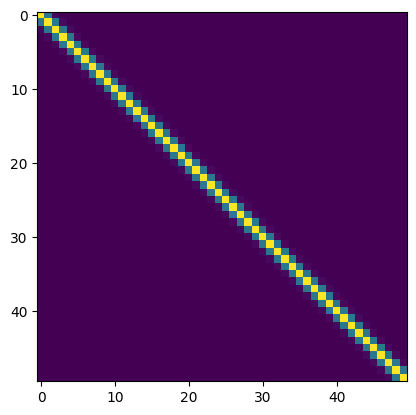

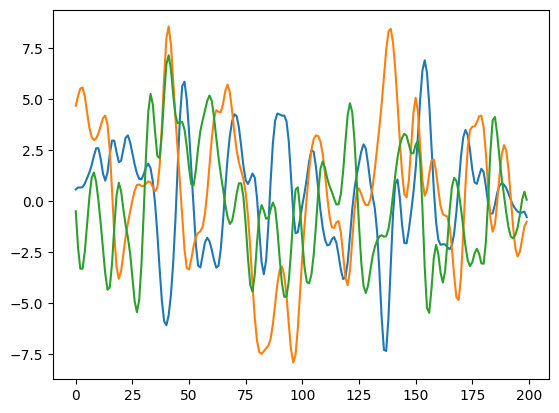

In [38]:
if __name__ == '__main__':
    
    # Load test data   
    train_inputs = np.array([2,4,7,1]).reshape((-1,1))
    plot_test_inputs = np.linspace(0,200).reshape((-1,1))
    train_outputs = np.array([0.2,0.7,0.3,0.2]).reshape((-1,1))
    
    plot_test_inputs = Xs = np.linspace(0,200).reshape(-1,1)
    mat  = sq_exp(Xs,Xs,3)
    plt.figure()
    plt.imshow(mat, interpolation='nearest', cmap='viridis')
    
    plt.figure()
    
    # Q1
    ls = 2
    sigma_n = 0.1
    mean = predictive_mean(train_inputs, train_outputs, plot_test_inputs, 
            ls, sigma_n, kernel=sq_exp).reshape((-1,))
    cov = predictive_cov(train_inputs, train_outputs, plot_test_inputs, 
            ls, sigma_n, kernel=sq_exp)
    var = np.diag(cov)

#     plt.plot(train_inputs, train_outputs, '*')
    
#     plt.plot(plot_test_inputs, mean, 'r')
#     plt.fill_between(plot_test_inputs.reshape((-1,)), 
#             mean + np.sqrt(var), mean - np.sqrt(var), alpha=0.2)
    
    # Q2
    plot_test_inputs = np.linspace(0, 199, 200).reshape(-1,1)
    samples = sample_prior(plot_test_inputs, d, 3, kernel=sq_exp)
    [plt.plot(plot_test_inputs, samples[i, :]) for i in range(3)]
    
    df = pd.DataFrame(samples.transpose())
    df.to_csv("path.csv")
    print(df)
    
    plt.show()
